## **Logistic Regression**

### **Installing Dependencies**

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### **Importing Dataset**

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_classes=2,
                       n_clusters_per_class=1, random_state=2, hypercube=False, class_sep=20)

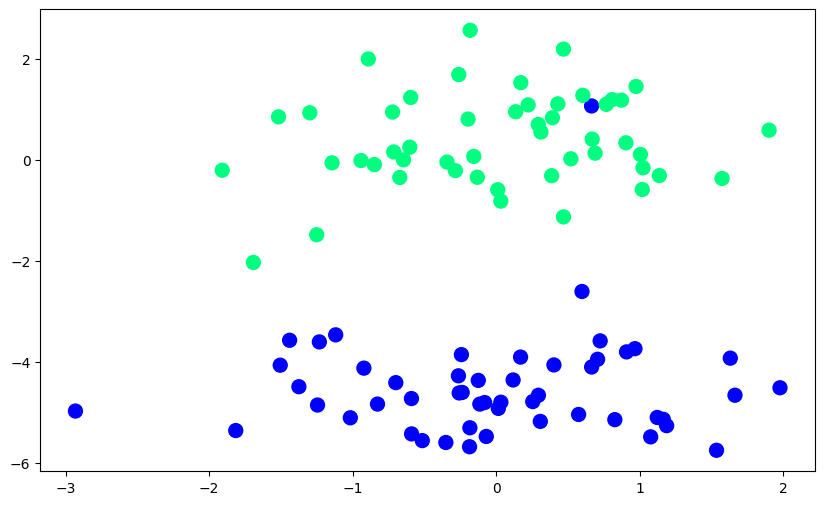

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2)

### **Logistic Regression**

In [5]:
class LogisticGD:
    def __init__(self, learning_rate: float = 0.01, epochs: int = 10) -> None:
        self.intercept_ = None
        self.coef_ = None
        self.learning_rate: float = learning_rate
        self.epochs: int = epochs

    def _sigmoid(self, x: float) -> float:
        return 1/(1 + np.exp(-x))

    def fit(self, X_train, y_train) -> None:
        X_train = np.insert(X_train, 0, 1, axis=1)
        weights = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_pred = self._sigmoid(np.dot(X_train, weights))
            weights = weights + self.learning_rate * (np.dot((y_train - y_pred), X_train) / X_train.shape[0])

        self.intercept_, self.coef_ = weights[0], weights[1:]

    def predict(self, X_test):
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        class_labels = np.where(y_pred > 0, 1, 0)
        return class_labels

In [6]:
lgd = LogisticGD(epochs=1000)

In [7]:
lgd.fit(X_train, y_train)

In [8]:
y_pred = lgd.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [9]:
y_test

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

### **Plotting**

In [10]:
m = - (lgd.coef_[0] / lgd.coef_[1])
b = - (lgd.intercept_ / lgd.coef_[1])

In [11]:
line_x = np.linspace(-3, 3, 100)
line_y = m*line_x + b

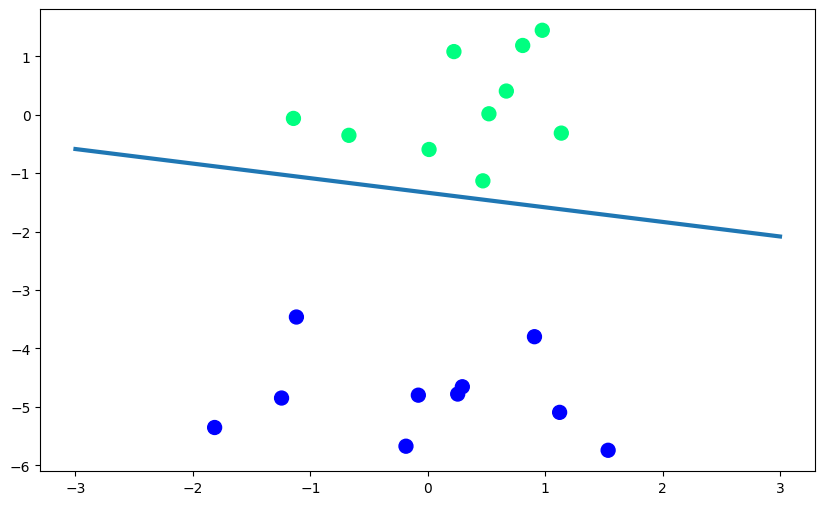

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(line_x, line_y, linewidth=3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='winter', s=100)